<a href="https://colab.research.google.com/github/saisushantht/Heights-and-Weights-with-Gender-kaggle/blob/master/Heights_and_Weights_with_Gender_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

With linear regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

importing the dataset from github

In [2]:
dataset_url='https://raw.githubusercontent.com/saisushantht/Heights-and-Weights-with-Gender-kaggle/master/weight-height.csv'
data = pd.read_csv(dataset_url)
data.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


Getting data Information

In [3]:
data.info()                

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


We have one object and two rows with float values in our data. 

to get basic statistical information

In [4]:
data.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


 to check if there are any null values in the data

In [5]:
data.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

Getting count of Gender in the Data

In [6]:
data['Gender'].value_counts()

Male      5000
Female    5000
Name: Gender, dtype: int64

In [7]:
data.shape

(10000, 3)

Scatter Plot with Weight on y and  Height on x

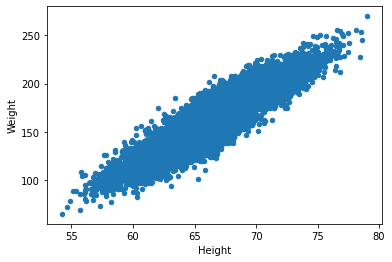

In [9]:
data.plot(kind='scatter',x='Height',y='Weight');

there is  a Linear relation between Height and Weight.As Hieght increase weight increases.

Male and Female Separation on Scatter Plot

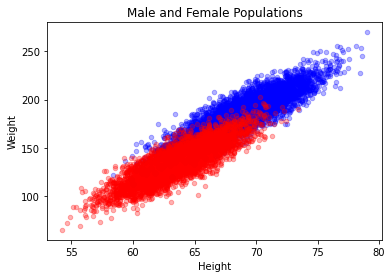

In [11]:
males=data[data['Gender']=='Male']
females=data[data['Gender']=='Female']

fig,ax = plt.subplots()
males.plot(kind='scatter',x='Height',y='Weight',
          ax=ax,color='blue',alpha=0.3,
          title='Male and Female Populations')
females.plot(kind='scatter',x='Height',y='Weight',
          ax=ax,color='red',alpha=0.3,
          title='Male and Female Populations');

In [12]:
X = data.iloc[:, :-1].values
X

array([['Male', 73.847017017515],
       ['Male', 68.78190404589029],
       ['Male', 74.11010539178491],
       ...,
       ['Female', 63.8679922137577],
       ['Female', 69.03424313073461],
       ['Female', 61.944245879517204]], dtype=object)

In [13]:
X.shape

(10000, 2)

In [14]:
Y=data.iloc[:,2].values
Y.shape

(10000,)

In [15]:
Y

array([241.89356318, 162.31047252, 212.74085556, ..., 128.47531878,
       163.85246135, 113.64910268])

# convert gender to number

i.e convert all categorical values (text values) to numerical values.
by using LabelEncoder

In [16]:
from sklearn.preprocessing import LabelEncoder
en = LabelEncoder()
X[:,0] = en.fit_transform(X[:,0])

In [17]:
X

array([[1, 73.847017017515],
       [1, 68.78190404589029],
       [1, 74.11010539178491],
       ...,
       [0, 63.8679922137577],
       [0, 69.03424313073461],
       [0, 61.944245879517204]], dtype=object)

Splitting data into training set and test set

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3) 

In [19]:
print(X_train.shape)
print(X_test.shape)

(7000, 2)
(3000, 2)


Model

In [20]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

Fitting Regression Model

In [21]:
model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Predicting test set values

In [22]:
Y_pred = model.predict(X_test)

Plotting the given data against the predicted data

In [29]:
from sklearn import metrics
print('R square = ',metrics.r2_score(Y_test, Y_pred))
print('Mean squared Error = ',metrics.mean_squared_error(Y_test, Y_pred))
print('Mean absolute Error = ',metrics.mean_absolute_error(Y_test, Y_pred))


R square =  0.9017781848910443
Mean squared Error =  99.65089464634251
Mean absolute Error =  7.913668345670357


In [30]:
model.score(X_test,Y_test)

0.9017781848910443

In [33]:
model.intercept_,model.coef_

(-244.22032134621762, array([19.31316596,  5.96647117]))